# Test Set

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from my_measures import BinaryClassificationPerformance
from datetime import datetime
%matplotlib inline

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Read raw test data

In [8]:
amazon = pd.read_csv('/Users/Shirley/Desktop/amazon_data/raw_data_test.csv')
print(amazon.shape)

(91000, 14)


In [9]:
print(amazon.loc[0, "Text"])

I read a lot about Muscovado sugar for years and decided to order some for my Christmas baking.  I give away a lot of baked goodies as thank you gifts to friends, family and those who have helped and supported me and my family over the year, like my Vet and the hospital staff.  There is no comparison.  Everyone was asking what I did to the recipes to improve on already excellent products.  As I was making the doughs and batters, one taste told me that I was onto something great.  I'm not going back to regular sugars.  Muscovado is worth EVERY penny of the extra costs.  Try it once and you'll be hooked.  I am.  Just wish I had purchased it sooner.


In [10]:
print(amazon.head())
print(amazon['helpful'].mean())

   Unnamed: 0  Unnamed: 0.1      Id   ProductId          UserId  \
0      370074         78819   78820  B001E5DZSO  A30L5CFTLVSHB6   
1      105085        262411  262412  B000SU8LN0  A1ISPBZI0KPIDV   
2      251367         44398   44399  B0018OMTOM  A2EP9H9KGZOYX4   
3       25183         85542   85543  B0019FOZC4  A1S0C41FT4SVO6   
4      343131        332901  332902  B0001VAFGW  A2UOWSLIBMIM1U   

                                       ProfileName  HelpfulnessNumerator  \
0                                        D. Rochon                     4   
1  David Traver Adolphus "Debonair man-about-town"                     1   
2                             Shayna P.  Kleinbaum                     3   
3                                             S.K.                     0   
4                                       J. Carruth                     4   

   HelpfulnessDenominator  Score        Time  \
0                       4      5  1269388800   
1                       3      1  1300320000

### Feature extraction on natural language data

In [11]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# corpus = amazon.Text.as_matrix()
# X_bag_of_words = vectorizer.fit_transform(corpus)
# print(X_bag_of_words.toarray())

In [12]:
# vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import HashingVectorizer
# hv = HashingVectorizer(n_features=2 ** 20, non_negative=True)
hv = joblib.load('hv.pkl')
X_hv = hv.transform(amazon.Text)
print(X_hv.shape)

/Users/Shirley/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


(91000, 131072)


In [13]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer()
transformer = joblib.load('transformer.pkl')
X_tfidf = transformer.transform(X_hv)

In [14]:
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


In [15]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct



amazon['Text'] = amazon['Text'].apply(lambda x: remove_punct(x))
# amazon['Score'] = amazon['Score'].astype('int').apply(lambda x: remove_punct(x))
amazon['Score'] = amazon['Score'].astype(float)
amazon['Summary'] = amazon['Summary'].astype('str').apply(lambda x: remove_punct(x))
amazon['ProfileName'] = amazon['ProfileName'].astype('str').apply(lambda x: remove_punct(x))



### Create additional quantitative features

In [16]:
# features from Amazon.csv to add to feature set
amazon['reviewLen'] = amazon['Text'].str.len()
#amazon['summaryLen'] = amazon['Summary'].str.len()
amazon['summaryLen'] = amazon['Summary'].str.len().replace(np.nan, 0)
amazon['profileName'] = amazon['ProfileName'].str.len().replace(np.nan, 0)
# amazon['timeStamp'] = amazon['Time'].between(997228800, 1350864000, inclusive=True).astype('b')
amazon['timeStamp'] = amazon['Time']
amazon['summaryLenSq'] = amazon['summaryLen']*amazon['summaryLen'].replace(np.nan, 0)
amazon['reviewLenSq'] = amazon['reviewLen']*amazon['reviewLen'].replace(np.nan, 0)
amazon['lenSq'] = amazon['reviewLen']/amazon['summaryLen'].replace(np.nan, 0)
amazon['lenSum'] = amazon['reviewLen']+amazon['summaryLen'].replace(np.nan, 0)
# amazon['ScoreSq'] = amazon["Score"] * amazon["Score"].replace(np.nan, 0)
#X_quant_features = amazon[["Score", "lenSum","profileName", "reviewLenSq", "summaryLenSq","reviewLen","summaryLen", "timeStamp"]]
#X_quant_features = amazon[["Score","reviewLen","summaryLen", "timeStamp"]]
# X_quant_features = amazon[["Score", "lenSum", "reviewLenSq", "summaryLenSq","reviewLen","summaryLen", "timeStamp"]]
X_quant_features = amazon[["lenSum", "reviewLenSq", "summaryLenSq","reviewLen","summaryLen", "timeStamp"]]
#X_quant_features = amazon[["Score", "lenSum", "reviewLenSq", "summaryLenSq", "timeStamp"]]
#X = X.as_matrix().astype(np.float)
#X_quant_features = amazon[["Score", "reviewLen"]]
print(X_quant_features.head(10))
print(type(X_quant_features))

   lenSum  reviewLenSq  summaryLenSq  reviewLen  summaryLen   timeStamp
0     654       408321           225        639          15  1269388800
1     423       164836           289        406          17  1300320000
2     287        65536           961        256          31  1256515200
3    1408      1915456           576       1384          24  1346025600
4     357        98596          1849        314          43  1266105600
5     123        12321           144        111          12  1213315200
6     144        12996           900        114          30  1345334400
7     148        19321            81        139           9  1324080000
8     902       790321           169        889          13  1344556800
9     279        65536           529        256          23  1346025600
<class 'pandas.core.frame.DataFrame'>


### Combine all quantitative features into a single sparse matrix

In [17]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(91000, 131078)


### Create `X`, scaled matrix of features

In [18]:
# feature scaling
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(with_mean=False)
sc = joblib.load('sc.pkl')
X = sc.transform(X_matrix)
print(X.shape)

(91000, 131078)


### create `y`, vector of Labels

In [19]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


### predict `y` with the fit on the training set

In [20]:
# # MODEL: ordinary least squares
# # from sklearn import linear_model
# # ols = linear_model.SGDClassifier(loss="squared_loss")
# # ols.fit(X, y)
# # joblib.dump(ols, 'ols.pkl') # pickle
# ols = joblib.load('ols.pkl') # pickle

# ols_performance = BinaryClassificationPerformance(ols.predict(X), y, 'ols')
# ols_performance.compute_measures()
# print(ols_performance.performance_measures)

In [21]:
# # MODEL: SVM, linear
# # from sklearn import linear_model
# # svm = linear_model.SGDClassifier()
# # svm.fit(X, y)
# # joblib.dump(svm, 'svm.pkl') # pickle
# svm = joblib.load('svm.pkl') # pickle

# svm_performance = BinaryClassificationPerformance(svm.predict(X), y, 'svm')
# svm_performance.compute_measures()
# print(svm_performance.performance_measures)

In [22]:
# # MODEL: logistic regression
# # from sklearn import linear_model
# # lgs = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=0.00001)
# # lgs.fit(X, y)
# # joblib.dump(lgs, 'lgs.pkl') # pickle
# lgs = joblib.load('lgs.pkl')

# lgs_performance = BinaryClassificationPerformance(lgs.predict(X), y, 'lgs')
# lgs_performance.compute_measures()
# print(lgs_performance.performance_measures)

In [23]:
# # MODEL: Naive Bayes
# # from sklearn.naive_bayes import MultinomialNB
# # nbs = MultinomialNB()
# # nbs.fit(X, y)
# # joblib.dump(nbs, 'nbs.pkl') # pickle
# nbs = joblib.load('nbs.pkl')

# nbs_performance = BinaryClassificationPerformance(nbs.predict(X), y, 'nbs')
# nbs_performance.compute_measures()
# print(nbs_performance.performance_measures)

In [24]:
# # MODEL: Perceptron
# # from sklearn import linear_model
# # prc = linear_model.SGDClassifier(loss='perceptron')
# # prc.fit(X, y)
# # joblib.dump(prc, 'prc.pkl') # pickle
# prc = joblib.load('prc.pkl')

# prc_performance = BinaryClassificationPerformance(prc.predict(X), y, 'prc')
# prc_performance.compute_measures()
# print(prc_performance.performance_measures)

In [25]:
# # MODEL: Ridge Regression Classifier
# # from sklearn import linear_model
# # rdg = linear_model.RidgeClassifier()
# # rdg.fit(X, y)
# # joblib.dump(rdg, 'rdg.pkl') # pickle
# rdg = joblib.load('rdg.pkl')

# rdg_performance = BinaryClassificationPerformance(rdg.predict(X), y, 'rdg')
# rdg_performance.compute_measures()
# print(rdg_performance.performance_measures)

In [26]:
# MODEL: Decision Tree Classifier
# from sklearn import tree
# dtc = tree.DecisionTreeClassifier(max_depth=100)
# dtc.fit(X_matrix, y)
# joblib.dump(dtc, 'dtc.pkl') # pickle
dtc = joblib.load('dtc.pkl')

dtc_performance = BinaryClassificationPerformance(dtc.predict(X_matrix), y, 'dtc')
dtc_performance.compute_measures()
print(dtc_performance.performance_measures)

{'Pos': 6715, 'Neg': 84285, 'TP': 2861, 'TN': 81081, 'FP': 3204, 'FN': 3854, 'Accuracy': 0.9224395604395604, 'Precision': 0.4717230008244023, 'Recall': 0.42606105733432614, 'desc': 'dtc'}


### ROC plot to compare performance of various models and fits

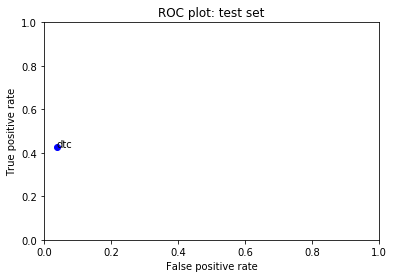

In [27]:
fits = [dtc_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ridge Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [275]:
amazon.loc[0, "Text"]

'I read a lot about Muscovado sugar for years and decided to order some for my Christmas baking  I give away a lot of baked goodies as thank you gifts to friends family and those who have helped and supported me and my family over the year like my Vet and the hospital staff  There is no comparison  Everyone was asking what I did to the recipes to improve on already excellent products  As I was making the doughs and batters one taste told me that I was onto something great  Im not going back to regular sugars  Muscovado is worth EVERY penny of the extra costs  Try it once and youll be hooked  I am  Just wish I had purchased it sooner'

In [276]:
amazon.loc[0, "helpful"]

True

In [179]:
ridge_predictions = rdg.predict(X)

In [180]:
ridge_predictions.shape

(91000,)

In [181]:
print(ridge_predictions)

[False False False ... False False False]


In [183]:
# false positives

import random, time

for i in range(0, len(ridge_predictions)):
    if (ridge_predictions[i] == True):
        if (amazon.loc[i, "helpful"] == False):
            if (random.uniform(0, 1) < 0.05):
                print(i)
                print(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(amazon.loc[i, "Time"])))
                print(amazon.loc[i, "Score"])
                print(amazon.loc[i, "HelpfulnessDenominator"])
                print(amazon.loc[i, "ProductId"])
                print(amazon.loc[i, "Text"])
                print('* * * * * * * * * ')

2484
2010-01-27 00:00:00
1.0
24
B001Z7AEW6
A powerful chemical aftertaste that rendered anything I tried it onin  cereal coffee tea  close to inedible  Ive found that the other artificial sweeteners are palatable but this stuff is pretty dreadful  And if you read about it its no better or worse than the others despite their claims that it comes right from the garden and is made in a cottage by granny and some elves As well I would submit that some of the rave reviews are corporate plants  seriously look at their list of other reviews  Most importantly despite the green website for Truvia its manufactured by Cargill  Last I looked Cargill was a giant corporation that converts field crops into industrial products  Go ahead and try it but know that you were warned
* * * * * * * * * 
3181
2012-02-15 00:00:00
5.0
0
B0029XEY62
This is so fabulous I will definitly be ordering again Arrrived quickly and quality was beyond my expectations Thank you so much
* * * * * * * * * 
4807
2012-06-28 00: